In [66]:
import scipy.io
from scipy.fft import fft, ifft
import numpy as np
import resampy
import scipy.signal
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.integrate import simps
import pandas as pd
import neurokit2 as nk
import chart_studio.plotly as py
import eeglib
import re
import seaborn as sns
import itertools
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from keras.initializers import HeUniform
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [5]:
def resample(signal, fs_orig, fs_resample):
    return resampy.resample(signal, fs_orig, fs_resample)

In [6]:
def spectrum(signal, fft_signal, fs_resample):
    N = len(signal)
    T = 1/fs_resample
    f = np.linspace(0, 1 / T, N)

    x1 = f[:N // 2] 
    x2 = np.abs(fft_signal)[:N // 2] * 1 / N
    return x1, x2

In [7]:
def periodogram_plot(signal, fs_resample, window, scaling):
    f1, Pxx_den1 = scipy.signal.periodogram(signal, fs_resample,window, scaling=scaling)
    return f1, Pxx_den1

In [8]:
def truncate(norm_eeg, start_sample, final_sample):
    truncated_norm_eeg = []
    for patient_data in norm_eeg:
        truncated_patient_data = []
        for channel_data in patient_data:
            truncated_channel_data = channel_data[start_sample:final_sample]
            truncated_patient_data.append(truncated_channel_data)
        truncated_norm_eeg.append(truncated_patient_data)
    return truncated_norm_eeg

In [9]:
def process_eeg(final_eeg_signal, fs_resample, fs_orig):
    processed_eeg = []
    fft_eeg = []
    for i in range(len(final_eeg_signal)):
        single_eeg_resample = resample(np.array(final_eeg_signal[i]), fs_orig[i], fs_resample)
        single_eeg_norm = sklearn.preprocessing.normalize(single_eeg_resample)
        single_fft_eeg = fft(single_eeg_norm)
        processed_eeg.append(single_eeg_norm)
        fft_eeg.append(single_fft_eeg)
    return processed_eeg, fft_eeg


In [10]:
def cluster_channel_one(eeg):
    channel1 = eeg[0]
    channel2 = eeg[1]
    channel3 = eeg[2]
    channel4 = eeg[3]
    channel5 = eeg[9]
    channel6 = eeg[10]
    channel7 = eeg[15]

    sum1 = np.add(channel1,channel2)
    sum2 = np.add(sum1,channel3)
    sum3 = np.add(sum2, channel4)
    sum4 = np.add(sum3,channel5)
    sum5 = np.add(sum4,channel6)
    sum6 = np.add(sum5,channel7)

    final_sum = sum6/7
    return final_sum

In [11]:
# def cluster_channel_two(eeg):
#     channel1 = eeg[4]
#     channel2 = eeg[5]
#     channel3 = eeg[16]

#     sum1 = np.add(channel1,channel2)
#     sum2 = np.add(sum1,channel3)
    
#     final_sum = sum2/3
#     return final_sum

In [11]:
def cluster_channel_three(eeg):
    channel1 = eeg[6]
    channel2 = eeg[17]

    final_sum = np.add(channel1, channel2) / 2
    return final_sum

In [12]:
def cluster_channel_four(eeg):
    channel1 = eeg[7]
    channel2 = eeg[8]

    sum1 = np.add(channel1, channel2)

    final_sum = sum1/2
    return final_sum

In [13]:
def cluster_channel_five(eeg):
    channel1 = eeg[11]
    channel2 = eeg[13]

    sum1 = np.add(channel1, channel2)

    final_sum = sum1/2
    return final_sum

In [14]:
def cluster_channel_six(eeg):
    channel1 = eeg[12]
    channel2 = eeg[14]

    sum1 = np.add(channel1, channel2)

    final_sum = sum1/2
    return final_sum

In [15]:
cluster_channels = [['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz'], ['P3', 'Pz'], ['O1', 'O2'], ['T3', 'T5'], ['T4', 'T6']]
channel_order = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

def cluster_eeg_channels(eeg_data):

    clustered_eeg = []

    for patient_eeg in eeg_data:
        patient_clustered_eeg = []
        patient_clustered_eeg.append(cluster_channel_one(patient_eeg))
        # patient_clustered_eeg.append(cluster_channel_two(patient_eeg))
        patient_clustered_eeg.append(cluster_channel_three(patient_eeg))
        patient_clustered_eeg.append(cluster_channel_four(patient_eeg))
        patient_clustered_eeg.append(cluster_channel_five(patient_eeg))
        patient_clustered_eeg.append(cluster_channel_six(patient_eeg))

        clustered_eeg.append(patient_clustered_eeg)
    return clustered_eeg

In [16]:
def bandpassFilter(truncated_eeg, order, start, stop, fs_resample):
    filteredBandPassEEG = []
    for k in range(len(truncated_eeg)):
        channel_bandpass_eeg = []
        for i in range(n_channels):
            b, a = scipy.signal.butter(order, [start,stop], 'band',fs=fs_resample)
            single_filteredBandPass_EEG = scipy.signal.lfilter(b, a, truncated_eeg[k][i])
            channel_bandpass_eeg.append(single_filteredBandPass_EEG)

        filteredBandPassEEG.append(channel_bandpass_eeg)
    return filteredBandPassEEG

In [17]:
def extract_features(eeg_data, fs_resample):
    all_std, all_mean, all_bandpowers = [], [], []

    # Calculate the min, max, standard deviation, mean and bandpower for each patient's channels
    for patient_data in eeg_data:
        all_std.append(np.std(patient_data, axis=1))
        all_mean.append(np.mean(patient_data, axis=1))

        patient_bandpowers = []
        bandpower_df = nk.eeg_power(patient_data, fs_resample)
        for _, row in bandpower_df.iterrows():
            # Get the bandpower values
            gamma, beta, alpha, theta, delta = row[['Hz_30_80', 'Hz_13_30', 'Hz_8_13', 'Hz_4_8', 'Hz_1_4']]
            patient_bandpowers.append([gamma, beta, alpha, theta, delta])
        all_bandpowers.append(patient_bandpowers)
    
    # Convert list of arrays to 2D arrays
    all_std = np.array(all_std)
    all_mean = np.array(all_mean)
    all_bandpowers = np.array(all_bandpowers) 

    # Create a DataFrame and add the features
    df = pd.DataFrame()
    for i in range(all_std.shape[1]):  # Loop over the number of channels
        df[f'Channel_{i+1}_STD'] = all_std[:, i]
        df[f'Channel_{i+1}_Mean'] = all_mean[:, i]
        
        for j in range(all_bandpowers.shape[2]):  # Loop over the number of bandpowers
            df[f'Channel_{i+1}_Bandpower_{j+1}'] = all_bandpowers[:, i, j]

    return df


In [18]:
df = pd.read_pickle('CCIR_DF_Large.pkl')

In [19]:
eeg_signal = df['EEG'].tolist()
fs_orig = df["FS"].tolist()

In [20]:
del_eeg_signal = [patient_eeg[:7] + patient_eeg[8:] for patient_eeg in eeg_signal]
print(len(del_eeg_signal[0]))

18


In [21]:
clustered_eeg = cluster_eeg_channels(del_eeg_signal)
# compare_eeg = clustered_eeg[0][1]
# test_eeg = del_eeg_signal[0]

# channel1 = test_eeg[6]
# channel2 = test_eeg[17]

# final_sum = np.add(channel1, channel2) / 2

# if np.array_equal(final_sum, compare_eeg):
#     print("They match!")


In [22]:
fs_resample = 100
processed_eeg, fft_eeg = process_eeg(clustered_eeg, fs_resample, fs_orig)

In [23]:
del df['EEG']
del df['FS']
cpc_scores = df['CPC']
del df['CPC']
outcomes = df['Outcome']
del df['Outcome']
del df['index']

In [24]:
print(df)

    Age  Sex  ROSC  OHCA  Shockable Rhythm
0    56    0     3     1                 1
1    71    0    20     1                 1
2    66    0     5     0                 0
3    59    0    18     0                 0
4    40    0     5     0                 0
..  ...  ...   ...   ...               ...
70   70    0    29     0                 1
71   46    0    10     1                 1
72   55    0     4     0                 1
73   90    0     5     1                 1
74   87    0     7     0                 1

[75 rows x 5 columns]


In [25]:
# min_len = len(processed_eeg[0][0])
# for i in range(len(processed_eeg)):
#     if len(processed_eeg[i][0]) < min_len:
#         min_len = len(processed_eeg[i][0])
# print(min_len)

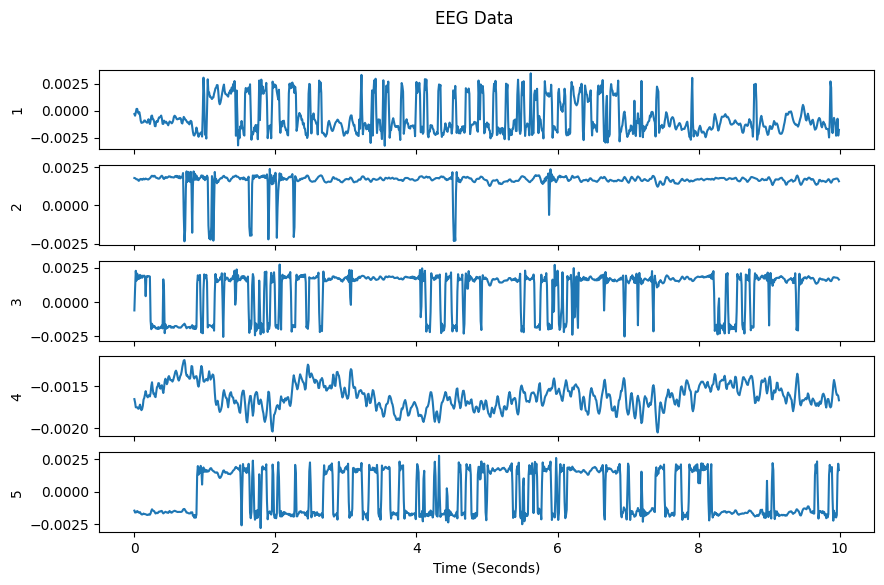

In [26]:
start_sample = 42000
final_sample = 43000
n_samples = 1000  # Total number of samples per channel
time = np.arange(n_samples) / fs_resample  # Generate time vector
n_channels = 5

# Create subplots for each channel
fig, axs = plt.subplots(n_channels, 1, figsize=(10, 6), sharex=True)


# Plots each channel from 00:07:00 to 00:07:10
for channel in range(n_channels):
    axs[channel].plot(time, processed_eeg[0][channel][start_sample:final_sample])
    axs[channel].set_ylabel(f'{channel+1}')


axs[-1].set_xlabel('Time (Seconds)')
fig.suptitle('EEG Data')


# plt.tight_layout()

# Show the plot
plt.show()

In [27]:

truncated_eeg = truncate(processed_eeg, start_sample, final_sample)


In [28]:
order = 3
low_freq = 1
upper_freq = 49

filteredBandPassEEG = bandpassFilter(truncated_eeg, order, low_freq, upper_freq, fs_resample)

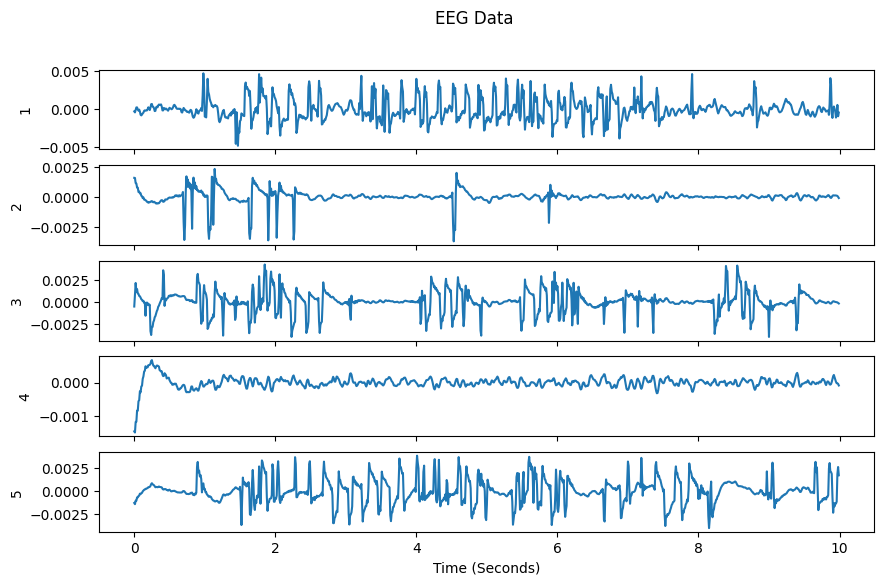

In [29]:
fig2, axs2 = plt.subplots(n_channels, 1, figsize=(10, 6), sharex=True)


# Plots each channel from 00:07:00 to 00:07:10
for channel in range(n_channels):
    axs2[channel].plot(time, filteredBandPassEEG[0][channel])
    axs2[channel].set_ylabel(f'{channel+1}')


axs2[-1].set_xlabel('Time (Seconds)')
fig2.suptitle('EEG Data')



# Show the plot
plt.show()

In [30]:
filtered_eeg_array = np.array(filteredBandPassEEG)
print(len(filteredBandPassEEG[0]))

5


In [32]:
feature_df = extract_features(filtered_eeg_array, fs_resample)

c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:205: RuntimeWarning: invalid value encountered in divide
  power /= np.max(power)
c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:205: RuntimeWarning: invalid value encountered in divide
  power /= np.max(power)
c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:205: RuntimeWarning: invalid value encountered in divide
  power /= np.max(power)
c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:205: RuntimeWarning: invalid value encountered in divide
  power /= np.max(power)
c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:205: RuntimeWarning: invalid value encountered in divide
  power /= np.max(power)
c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packag

In [33]:
all_features_df = pd.concat([df, feature_df], axis=1, join='inner') 

In [34]:
all_features_df['Label'] = outcomes

In [35]:
print(all_features_df)

    Age  Sex  ROSC  OHCA  Shockable Rhythm  Channel_1_STD  Channel_1_Mean  \
0    56    0     3     1                 1       0.001392   -2.207082e-06   
1    71    0    20     1                 1       0.000576    4.075365e-07   
2    66    0     5     0                 0       0.002079   -5.968574e-06   
3    59    0    18     0                 0       0.000229   -1.866128e-06   
4    40    0     5     0                 0       0.001533   -1.061267e-05   
..  ...  ...   ...   ...               ...            ...             ...   
70   70    0    29     0                 1       0.001400    4.898956e-06   
71   46    0    10     1                 1       0.001182    2.701292e-06   
72   55    0     4     0                 1       0.001430    1.618041e-05   
73   90    0     5     1                 1       0.001317    1.000479e-06   
74   87    0     7     0                 1       0.001197    1.386196e-06   

    Channel_1_Bandpower_1  Channel_1_Bandpower_2  Channel_1_Bandpower_3  ..

In [ ]:
features = all_features_df.columns.tolist()
features.remove('Label')  # Remove the label column from the feature list
for feature in features:
    plt.figure(figsize=(10, 5))  
    all_features_df.boxplot(column=feature, by='Label')
    plt.title(f'Boxplot grouped by Label: {feature}')
    plt.suptitle('')  
    plt.show()


In [37]:
all_features_df.corr()

,Age,Sex,ROSC,OHCA,Shockable Rhythm,Channel_1_STD,Channel_1_Mean,Channel_1_Bandpower_1,Channel_1_Bandpower_2,Channel_1_Bandpower_3,...,Channel_4_Bandpower_4,Channel_4_Bandpower_5,Channel_5_STD,Channel_5_Mean,Channel_5_Bandpower_1,Channel_5_Bandpower_2,Channel_5_Bandpower_3,Channel_5_Bandpower_4,Channel_5_Bandpower_5,Label
Age,1.000000,0.164623,-0.263910,-0.033209,-0.025430,0.053411,-0.038554,0.049228,0.017477,0.030954,...,0.106066,0.140313,-0.066489,0.101494,-0.037216,-0.006958,-0.044161,0.006882,0.103947,0.211838
Sex,0.164623,1.000000,0.106885,-0.065022,-0.113391,-0.035360,0.240883,0.049734,0.072717,0.097452,...,-0.127209,-0.061497,-0.174871,0.009751,-0.058267,-0.015719,0.149085,0.131451,0.177623,0.020708
ROSC,-0.263910,0.106885,1.000000,-0.090920,0.024576,-0.309783,0.148198,-0.089629,-0.075057,-0.212201,...,-0.248718,-0.358382,-0.263572,0.088775,0.066275,0.058047,-0.139996,-0.249156,-0.275251,0.156685
OHCA,-0.033209,-0.065022,-0.090920,1.000000,0.209677,0.039519,0.013418,0.034725,0.040308,0.065303,...,0.000822,-0.084541,-0.056988,-0.058084,-0.067446,-0.064874,-0.103745,-0.092142,-0.085441,0.134022
Shockable Rhythm,-0.025430,-0.113391,0.024576,0.209677,1.000000,0.007242,-0.130986,0.031545,0.023487,-0.002389,...,-0.035850,0.023690,0.090011,0.163910,0.150378,0.103962,-0.060978,-0.076802,-0.093688,0.268044
Channel_1_STD,0.053411,-0.035360,-0.309783,0.039519,0.007242,1.000000,0.115620,0.466265,0.509713,0.474280,...,0.339184,0.275614,0.642833,-0.136912,0.239284,0.226144,0.193996,0.227142,0.142796,0.154400
Channel_1_Mean,-0.038554,0.240883,0.148198,0.013418,-0.130986,0.115620,1.000000,0.015846,0.045859,-0.040276,...,-0.148738,-0.173061,-0.121284,0.164756,0.073388,0.058734,-0.020055,-0.137597,-0.090104,0.062859
Channel_1_Bandpower_1,0.049228,0.049734,-0.089629,0.034725,0.031545,0.466265,0.015846,1.000000,0.909779,0.776902,...,0.218398,0.005006,0.280377,0.146093,0.374608,0.294889,0.173404,0.133044,-0.058628,0.200951
Channel_1_Bandpower_2,0.017477,0.072717,-0.075057,0.040308,0.023487,0.509713,0.045859,0.909779,1.000000,0.899472,...,0.327352,0.108115,0.360566,0.102623,0.370359,0.337851,0.236992,0.170154,-0.003396,0.140115
Channel_1_Bandpower_3,0.030954,0.097452,-0.212201,0.065303,-0.002389,0.474280,-0.040276,0.776902,0.899472,1.000000,...,0.415294,0.264950,0.372666,0.053440,0.146577,0.133028,0.273671,0.248105,0.119007,0.085365


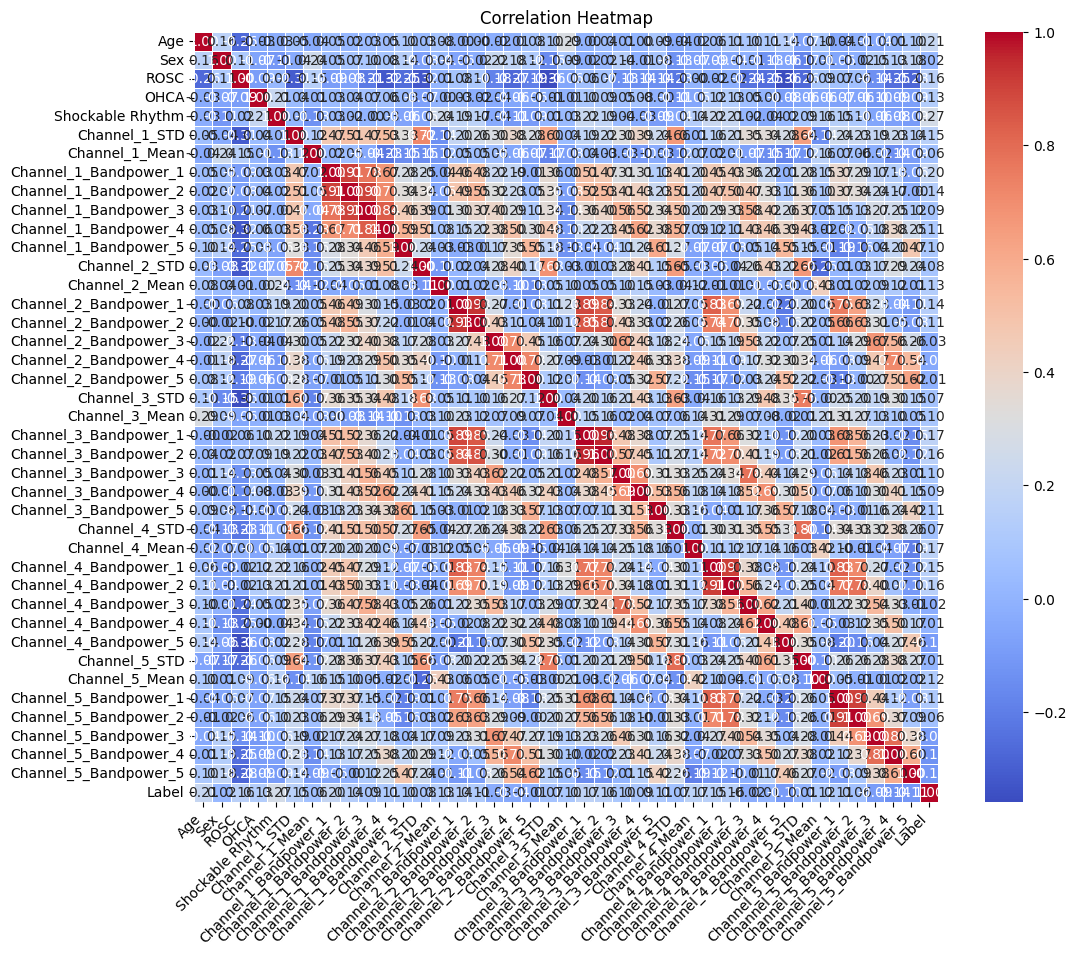

In [40]:
correlation_matrix = all_features_df.corr()

# Create the correlation heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha='right')

plt.title('Correlation Heatmap')
plt.show()

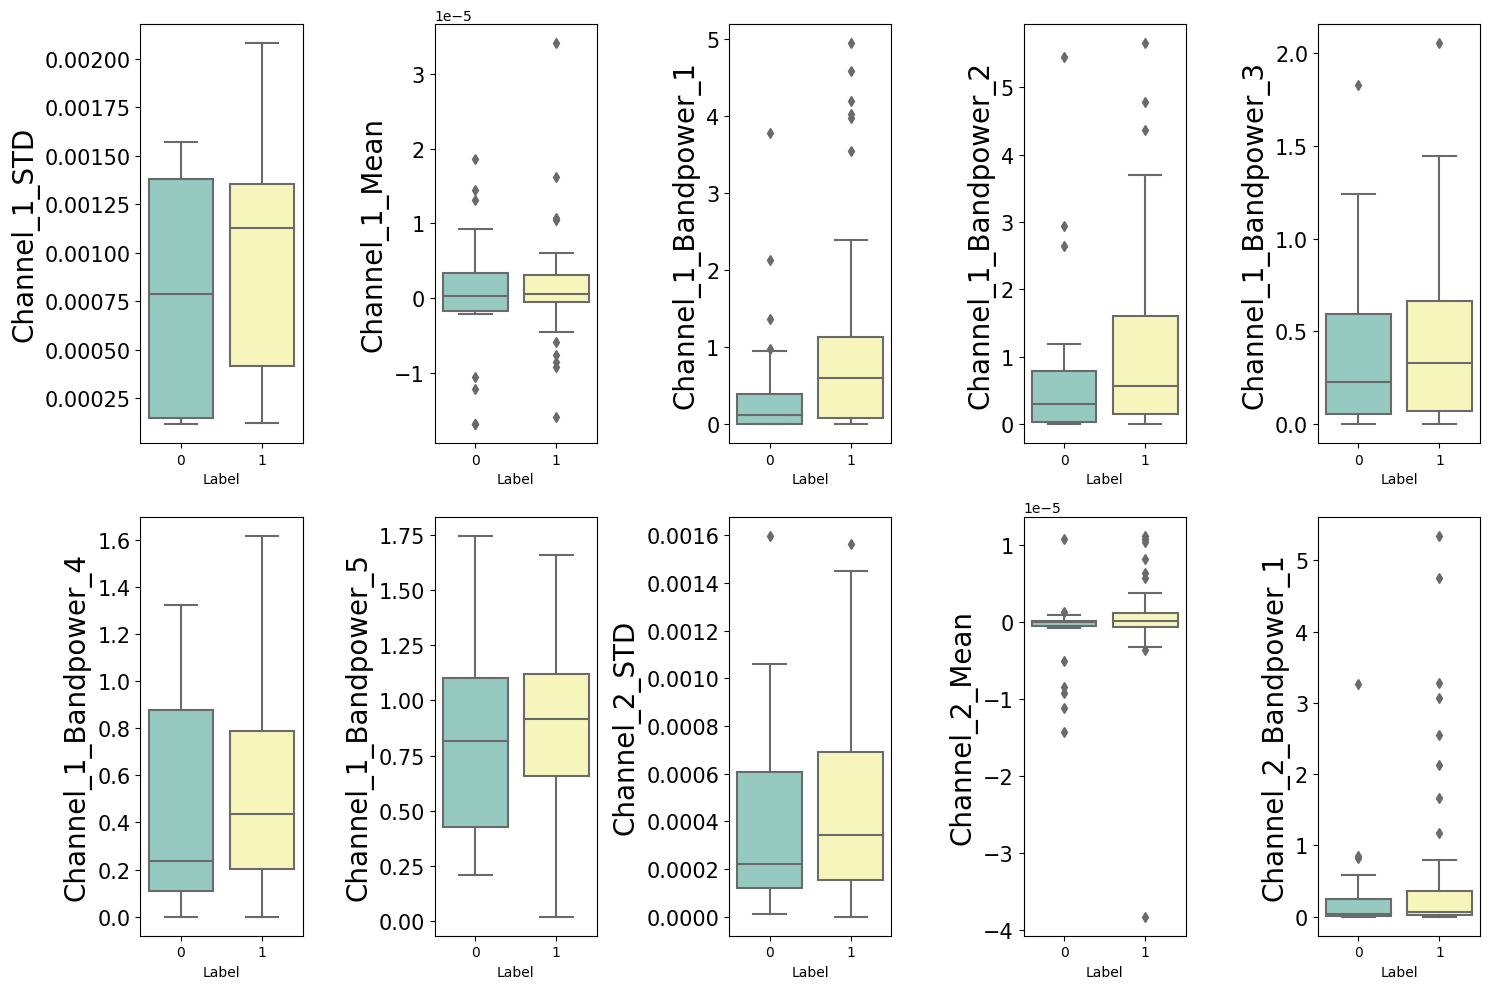

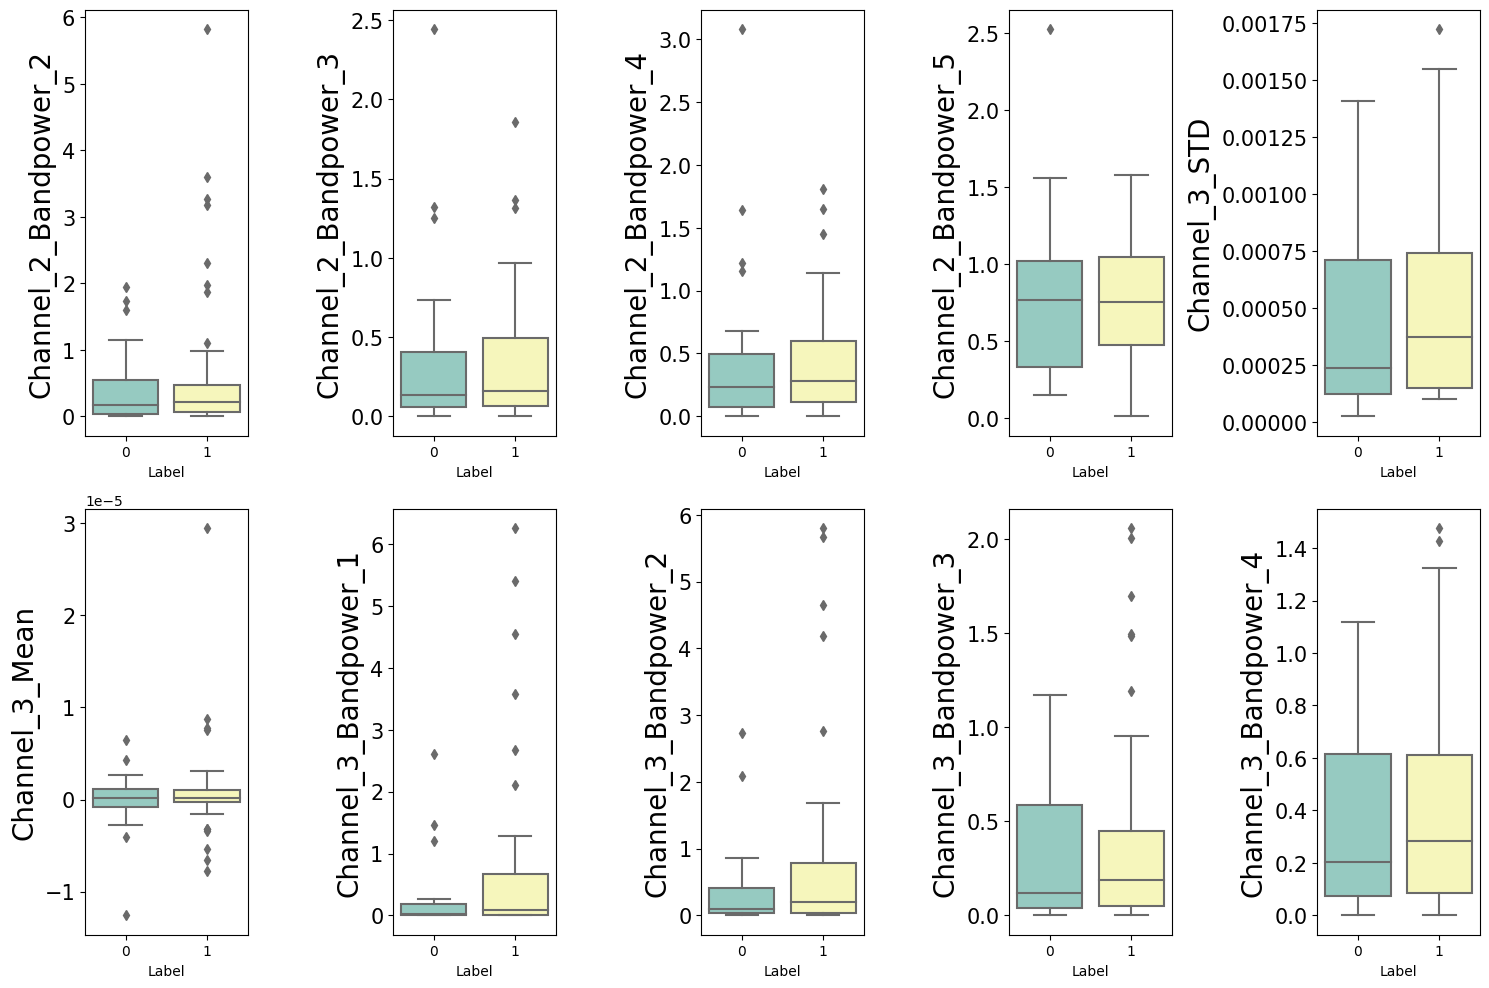

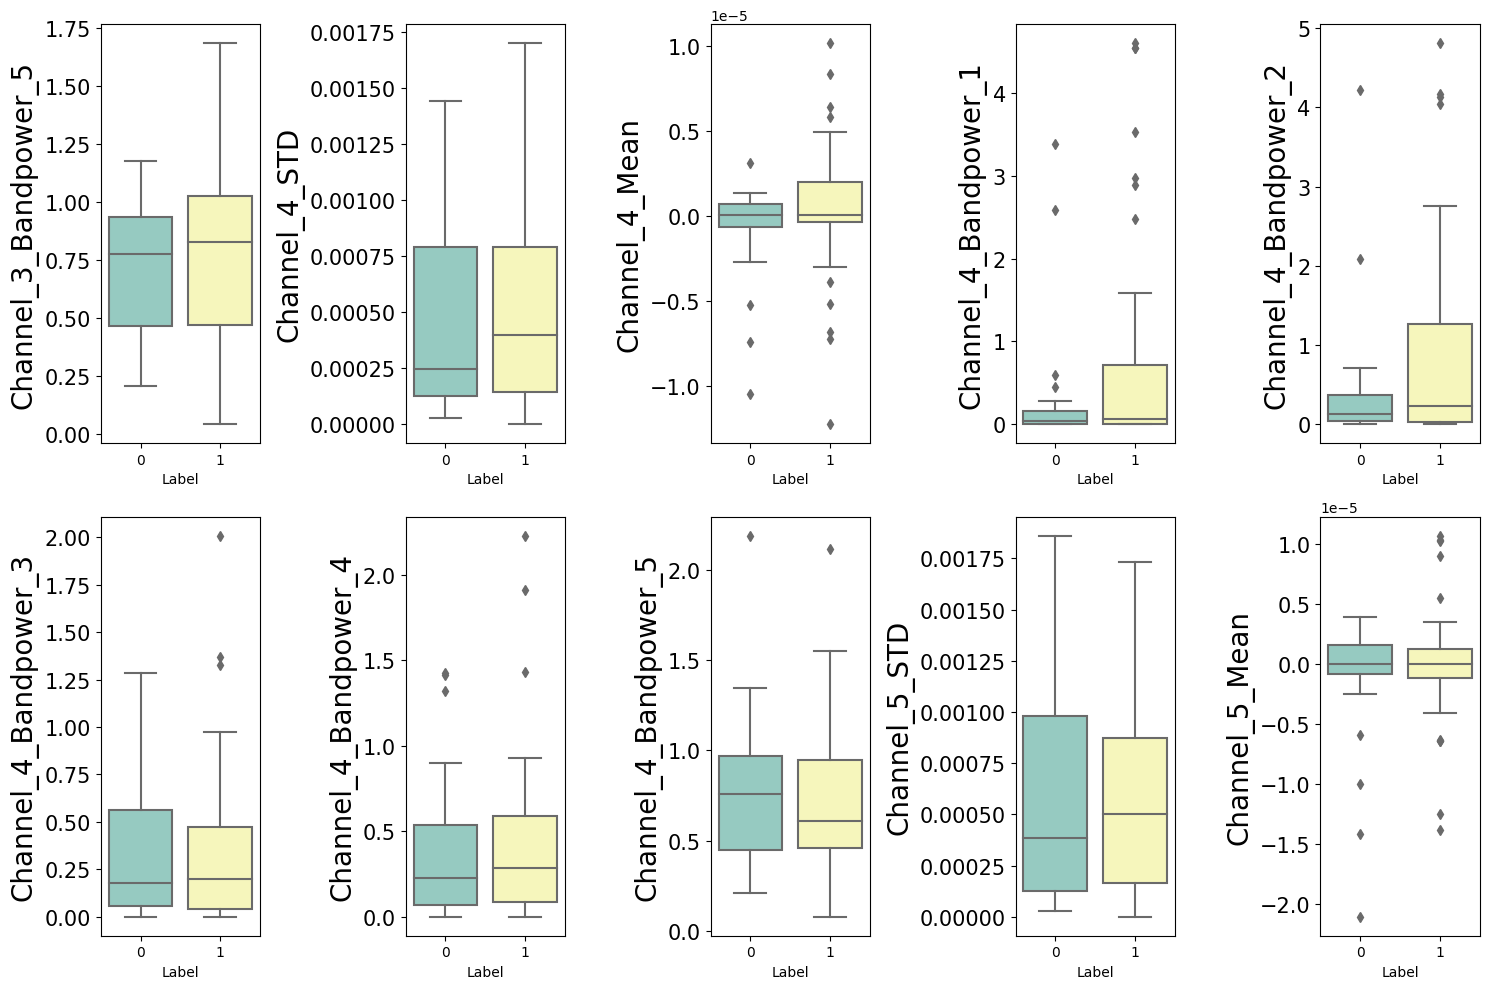

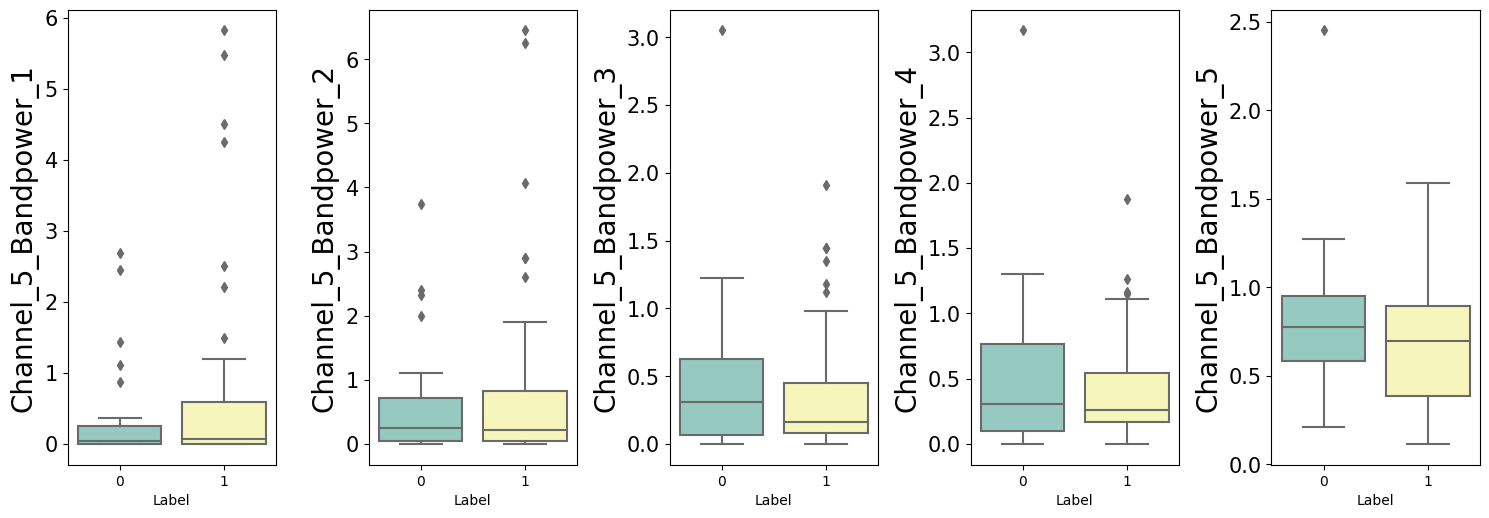

In [79]:
all_features_df['Label'] = outcomes_all
features = all_features_df.columns.tolist()
features.remove('Label')  # Remove the label column from the feature list
features.remove('Sex')
features.remove('OHCA')
features.remove('ROSC')
features.remove('Age')
features.remove('Shockable Rhythm')

num_features_per_plot = 10
num_plots = 4

for i in range(num_plots):
    features_subset = features[i * num_features_per_plot: (i + 1) * num_features_per_plot]

    plt.figure(figsize=(15, 10))  # Adjust as needed
    for j, feature in enumerate(features_subset):
        plt.subplot(2, 5, j + 1)
        
        sns.boxplot(data=all_features_df, x='Label', y=feature, palette='Set3')

        plt.xlabel('Label')
        plt.ylabel(f'{feature}', fontsize= 20)
        plt.yticks(fontsize=15)

    plt.tight_layout()
    plt.show()

In [36]:
all_features_df = all_features_df.dropna()
print(all_features_df)

    Age  Sex  ROSC  OHCA  Shockable Rhythm  Channel_1_STD  Channel_1_Mean  \
0    56    0     3     1                 1       0.001392   -2.207082e-06   
1    71    0    20     1                 1       0.000576    4.075365e-07   
2    66    0     5     0                 0       0.002079   -5.968574e-06   
3    59    0    18     0                 0       0.000229   -1.866128e-06   
4    40    0     5     0                 0       0.001533   -1.061267e-05   
..  ...  ...   ...   ...               ...            ...             ...   
70   70    0    29     0                 1       0.001400    4.898956e-06   
71   46    0    10     1                 1       0.001182    2.701292e-06   
72   55    0     4     0                 1       0.001430    1.618041e-05   
73   90    0     5     1                 1       0.001317    1.000479e-06   
74   87    0     7     0                 1       0.001197    1.386196e-06   

    Channel_1_Bandpower_1  Channel_1_Bandpower_2  Channel_1_Bandpower_3  ..

In [45]:
age_good = []
age_bad = []
for i in all_features_df.index:
    if(all_features_df['Label'][i] == 0):
        age_good.append(all_features_df['Age'][i])
    else:
        age_bad.append(all_features_df['Age'][i])
print("Mean of healthy patients: " + str(np.mean(age_good)))
print("Mean of unhealthy patients: " + str(np.mean(age_bad)))
print("STD of healthy patients: " + str(np.std(age_good)))
print("STD of healthy patients: " + str(np.std(age_good)))

Mean of healthy patients: 54.958333333333336
Mean of unhealthy patients: 64.55102040816327
STD of healthy patients: 15.546916003575188
STD of healthy patients: 15.546916003575188


In [48]:
rosc_good = []
rosc_bad = []
for i in all_features_df.index:
    if(all_features_df['Label'][i] == 0):
        rosc_good.append(all_features_df['ROSC'][i])
    else:
        rosc_bad.append(all_features_df['ROSC'][i])
print("Mean of healthy patients: " + str(np.mean(rosc_good)))
print("Mean of unhealthy patients: " + str(np.mean(rosc_bad)))
print("STD of healthy patients: " + str(np.std(rosc_good)))
print("STD of healthy patients: " + str(np.std(rosc_good)))


Mean of healthy patients: 14.041666666666666
Mean of unhealthy patients: 19.102040816326532
STD of healthy patients: 10.899079344401322
STD of healthy patients: 10.899079344401322


In [49]:
sex_good = []
sex_bad = []
for i in all_features_df.index:
    if(all_features_df['Label'][i] == 0):
        sex_good.append(all_features_df['Sex'][i])
    else:
       sex_bad.append(all_features_df['Sex'][i])

female_good = 0
male_good = 0
for i in range(len(sex_good)):
    if sex_good[i] == 0:
        male_good += 1
    else:
        female_good += 1

female_bad = 0
male_bad = 0
for i in range(len(sex_bad)):
    if sex_bad[i] == 0:
        male_bad += 1
    else:
        female_bad += 1

print("Number of healthy females: " + str(female_good))
print("Number of unhealthy females: " + str(female_bad))
print("Number of healthy males: " + str(male_good))
print("Number of unhealthy males: " + str(male_bad))

Number of healthy females: 7
Number of unhealthy females: 14
Number of healthy males: 17
Number of unhealthy males: 35


In [51]:
shock_good = []
shock_bad = []
for i in all_features_df.index:
    if(all_features_df['Label'][i] == 0):
        shock_good.append(all_features_df['Shockable Rhythm'][i])
    else:
       shock_bad.append(all_features_df['Shockable Rhythm'][i])

shockable_good = 0
for i in range(len(shock_good)):
    if shock_good[i] == 0:
        shockable_good += 1

shockable_bad = 0
for i in range(len(shock_bad)):
    if shock_bad[i] == 0:
        shockable_bad += 1

print("Number of shockable healthy patients: " + str(shockable_good))
print("Number of shockable unhealthy patients: " + str(shockable_bad))


Number of shockable healthy patients: 15
Number of shockable unhealthy patients: 16


In [52]:
ohca_good = []
ohca_bad = []
for i in all_features_df.index:
    if(all_features_df['Label'][i] == 0):
        ohca_good.append(all_features_df['OHCA'][i])
    else:
       ohca_bad.append(all_features_df['OHCA'][i])

actual_ohca_good = 0
for i in range(len(ohca_good)):
    if ohca_good[i] == 0:
        actual_ohca_good += 1

actual_ohca_bad = 0
for i in range(len(ohca_bad)):
    if ohca_bad[i] == 0:
        actual_ohca_bad += 1

print("Number of OHCA healthy patients: " + str(actual_ohca_good))
print("Number of OHCA unhealthy patients: " + str(actual_ohca_bad))

Number of OHCA healthy patients: 16
Number of OHCA unhealthy patients: 26


In [ ]:
all_features_df.to_hdf('EEG_Features.h5', key='data', mode='w')

In [34]:
print(all_features_df.isnull().values.any())

False


In [35]:
print(all_features_df)

    Age  Sex  ROSC  OHCA  Shockable Rhythm  Channel_1_STD  Channel_1_Mean  \
0    56    0     3     1                 1       0.001392   -2.207082e-06   
1    71    0    20     1                 1       0.000576    4.075365e-07   
2    66    0     5     0                 0       0.002079   -5.968574e-06   
3    59    0    18     0                 0       0.000229   -1.866128e-06   
4    40    0     5     0                 0       0.001533   -1.061267e-05   
..  ...  ...   ...   ...               ...            ...             ...   
70   70    0    29     0                 1       0.001400    4.898956e-06   
71   46    0    10     1                 1       0.001182    2.701292e-06   
72   55    0     4     0                 1       0.001430    1.618041e-05   
73   90    0     5     1                 1       0.001317    1.000479e-06   
74   87    0     7     0                 1       0.001197    1.386196e-06   

    Channel_1_Bandpower_1  Channel_1_Bandpower_2  Channel_1_Bandpower_3  ..

In [51]:
eeg_only_df = balanced_df.copy()
del eeg_only_df['Age']
del eeg_only_df['Sex']
del eeg_only_df['ROSC']
del eeg_only_df['OHCA']
del eeg_only_df['Shockable Rhythm']

In [37]:
outcomes_all = all_features_df['Label']

In [38]:
# outcomes = balanced_df['Label']

y = outcomes_all
del all_features_df['Label']
X = all_features_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [56]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [39]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [40]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.536667 (0.120600)
LDA: 0.510000 (0.259936)
KNN: 0.586667 (0.116619)
CART: 0.483333 (0.100277)
NB: 0.546667 (0.265916)
SVM: 0.710000 (0.066750)


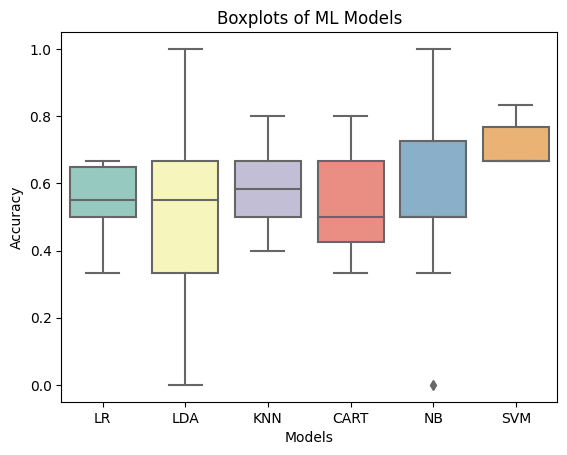

In [59]:
ax = sns.boxplot(data=results, orient='v', palette='Set3')
new_labels = ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']
ax.set_xticklabels(new_labels)

plt.title('Boxplots of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

In [60]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
30    0
47    1
34    1
35    0
48    1
25    1
9     1
52    1
18    0
23    0
11    0
36    1
66    1
70    1
49    1
Name: Label, dtype: int64


In [61]:
from sklearn.metrics import precision_score
pr=precision_score(y_test, predictions, average='macro')
print(pr)
from sklearn.metrics import recall_score
rec=recall_score(y_test, predictions, average='macro')
print(rec)
from sklearn.metrics import f1_score
f1=f1_score(y_test, predictions, average='macro')
print(f1)

0.3333333333333333
0.5
0.4


c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:


input_dim = X_train.shape[1] 

model = Sequential()
model.add(Dense(500, input_dim=input_dim, activation='relu', 
                kernel_initializer=HeUniform()))  
model.add(Dropout(0.3))  # lower dropout
model.add(Dense(500, activation='relu', 
                kernel_initializer=HeUniform())) 
model.add(Dropout(0.3)) 
model.add(Dense(250, activation='relu', 
                kernel_initializer=HeUniform()))  
model.add(Dropout(0.3)) 
model.add(Dense(1, activation='sigmoid'))

# Compile the model
opt = Adam(learning_rate=0.01)  
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1500, batch_size=16, verbose=1, callbacks=[es])  # increased epochs

# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1/1500
3/3 [==============================] - 1s 89ms/step - loss: 129.4492 - accuracy: 0.4565 - val_loss: 91.8803 - val_accuracy: 0.2500
Epoch 2/1500
3/3 [==============================] - 0s 24ms/step - loss: 39.4269 - accuracy: 0.6522 - val_loss: 11.7312 - val_accuracy: 0.7500
Epoch 3/1500
3/3 [==============================] - 0s 23ms/step - loss: 17.2929 - accuracy: 0.6522 - val_loss: 6.3433 - val_accuracy: 0.2500
Epoch 4/1500
3/3 [==============================] - 0s 26ms/step - loss: 5.8138 - accuracy: 0.4348 - val_loss: 0.6934 - val_accuracy: 0.7500
Epoch 5/1500
3/3 [==============================] - 0s 24ms/step - loss: 4.4362 - accuracy: 0.5652 - val_loss: 1.1937 - val_accuracy: 0.7500
Epoch 6/1500
3/3 [==============================] - 0s 20ms/step - loss: 3.1491 - accuracy: 0.6087 - val_loss: 0.7086 - val_accuracy: 0.5833
Epoch 7/1500
3/3 [==============================] - 0s 23ms/step - loss: 1.3227 - accuracy: 0.6304 - val_loss: 0.6790 - val_accuracy: 0.5833
Epoch 8

In [72]:
y_pred = model.predict(X_test)


y_pred = (y_pred > 0.5).astype(int)

y_pred = y_pred.flatten()

print("Predictions:", y_pred)
print("Actual values:", y_test)

pred = model.predict(X_test)

print(pred)

1/1 [==============================] - 0s 33ms/step
Predictions: [0 1 1 1 1 1 0 1 0 0 0 1 1 1 1]
Actual values: 30    0
47    1
34    1
35    0
48    1
25    1
9     1
52    1
18    0
23    0
11    0
36    1
66    1
70    1
49    1
Name: Label, dtype: int64
1/1 [==============================] - 0s 33ms/step
[[0.47887358]
 [0.5479904 ]
 [0.6649099 ]
 [0.98535645]
 [0.60209984]
 [0.65692717]
 [0.4129906 ]
 [0.6796068 ]
 [0.44672295]
 [0.4470519 ]
 [0.36925507]
 [0.5144827 ]
 [0.5698439 ]
 [0.5891692 ]
 [0.6962749 ]]


In [70]:
print(y_test)

30    0
47    1
34    1
35    0
48    1
25    1
9     1
52    1
18    0
23    0
11    0
36    1
66    1
70    1
49    1
Name: Label, dtype: int64


In [ ]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=2)
# metrics.auc(fpr, tpr)
from sklearn.metrics import average_precision_score

y_true_binary = tf.keras.utils.to_categorical(y_test, num_classes=2)

# auc_roc = roc_auc_score(y_true_binary, pred)
# precision, recall, thresholds = precision_recall_curve(y_true_binary, pred)

score =  average_precision_score(y_true_binary, pred)

print("AUC-ROC score:", score)


In [73]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"Sensitivity: {sensitivity}")


Precision: 0.9
Recall: 0.9
F1 score: 0.9
Sensitivity: 0.9


In [170]:
confusion_matrix(y_test, y_pred)

array([[4, 1],
       [1, 9]], dtype=int64)

In [159]:
# Save the model
model.save('modelWithoutNorm.h5')  


c:\Users\sendm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Reshape the EEG data
# eeg_data_reshaped = filtered_eeg_array.reshape(75, 5000, 1)  # Reshape to (patients, timesteps, channels)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(eeg_data_reshaped, outcomes, test_size=0.2, random_state=42)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(5000, 1), return_sequences=True))
# model.add(LSTM(64, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))








Epoch 1/50
4/4 [==============================] - 27s 6s/step - loss: 0.6911 - accuracy: 0.6500 - val_loss: 0.6941 - val_accuracy: 0.4667
Epoch 2/50
4/4 [==============================] - 23s 6s/step - loss: 0.6847 - accuracy: 0.7167 - val_loss: 0.6959 - val_accuracy: 0.4667
Epoch 3/50
4/4 [==============================] - 27s 7s/step - loss: 0.6760 - accuracy: 0.7167 - val_loss: 0.7000 - val_accuracy: 0.4667
Epoch 4/50
4/4 [==============================] - 34s 9s/step - loss: 0.6576 - accuracy: 0.7167 - val_loss: 0.7151 - val_accuracy: 0.4667
Epoch 5/50
4/4 [==============================] - 30s 8s/step - loss: 0.6283 - accuracy: 0.7167 - val_loss: 0.8522 - val_accuracy: 0.4667
Epoch 6/50
4/4 [==============================] - 34s 9s/step - loss: nan - accuracy: 0.4167 - val_loss: nan - val_accuracy: 0.5333
Epoch 7/50
4/4 [==============================] - 36s 9s/step - loss: nan - accuracy: 0.2833 - val_loss: nan - val_accuracy: 0.5333
Epoch 8/50
4/4 [==============================

In [68]:
model = load_model('modelWithoutNorm.h5')

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 500)               20500     
                                                                 
 dropout_36 (Dropout)        (None, 500)               0         
                                                                 
 dense_85 (Dense)            (None, 500)               250500    
                                                                 
 dropout_37 (Dropout)        (None, 500)               0         
                                                                 
 dense_86 (Dense)            (None, 250)               125250    
                                                                 
 dropout_38 (Dropout)        (None, 250)               0         
                                                                 
 dense_87 (Dense)            (None, 1)               